In [1]:
# Import essential libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

# List available input files in the Kaggle environment
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality-dataset/WineQT.csv


**Author:** Ayesha Saleem  

[![GitHub](https://img.shields.io/badge/GitHub-Visit_Profile-181717?style=flat&logo=github&logoColor=white)](https://github.com/aysh34)

## Table of Contents
1. [Introduction: The Problem of High-Dimensionality](#1-introduction-the-problem-of-high-dimensionality)
2. [What is PCA (Principal Component Analysis)?](#2-what-is-pca-principal-component-analysis)
3. [The PCA Process in Steps](#3-the-pca-process-in-steps)
4. [Data Loading and Initial Exploration](#4-data-loading-and-initial-exploration)
5. [Data Preprocessing (Scaling)](#5-data-preprocessing-scaling)
6. [Applying PCA](#6-applying-pca)
7. [Interpreting Explained Variance](#7-interpreting-explained-variance)
8. [Scree Plot: Choosing the Number of Components](#8-scree-plot-choosing-the-number-of-components)
9. [Visualizing PCA Results](#9-visualizing-pca-results)
10. [Impact of PCA on Model Performance (K-Nearest Neighbors)](#10-impact-of-pca-on-model-performance-k-nearest-neighbors)
11. [Conclusion](#11-conclusion)

# 1. Introduction: The Problem of High-Dimensionality
In today's world, we often work with datasets that have a large number of features. While having more data can help me build better models, it also introduces challenges. When the number of features grows, the data becomes sparse, and patterns become harder to detect. This is known as the "Curse of Dimensionality." It can lead to overfitting, increased computational cost, and difficulty in visualizing data.

# 2. What is PCA (Principal Component Analysis)?
Principal Component Analysis (PCA) is a statistical technique use to simplify complex datasets. The main idea is to transform the original features into a new set of variables called principal components. These components are uncorrelated and ordered so that the first few retain most of the variation present in the original data. Mathematically, PCA finds the directions (principal axes) in which the data varies the most and projects the data onto these axes. You can use PCA to:
- Reduce the number of features (dimensionality reduction)
- Visualize high-dimensional data
- Remove noise and redundancy
- Improve the performance of machine learning models

# 3. The PCA Process in Steps
Here is my detailed workflow for applying PCA:
1. **Load and explore the dataset:** First start by understanding the data, its features, and the target variable.
2. **Preprocess the data:** This includes handling missing values, encoding categorical variables, and scaling features so that each one contributes equally.
3. **Apply PCA:** Use PCA to transform the scaled features into principal components.
4. **Interpret explained variance:** Analyze how much information each principal component captures and decide how many components to keep.
5. **Visualize results:** Plot the principal components to see if patterns or clusters emerge.
6. **Modeling:** Finally, use the PCA-transformed data in machine learning models and compare their performance to models trained on the original data.

# 4. Data Loading and Initial Exploration
For this demonstration, I am using the Wine Quality dataset available on Kaggle. This dataset contains physicochemical properties of red and white wine samples, along with a quality score. It is a great example for PCA because it has multiple features and a clear target variable.

I start by loading the Wine Quality dataset from Kaggle and exploring its structure.

In [2]:
# 4. Data Loading and Initial Exploration
# I start by loading the Wine Quality dataset from Kaggle.
wine_path = '/kaggle/input/wine-quality-dataset/WineQT.csv'
df = pd.read_csv(wine_path)

In [3]:
# Let's look at the first few rows to understand the structure of the data.
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
# Check for missing values in each column.
missing = df.isnull().sum()
missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

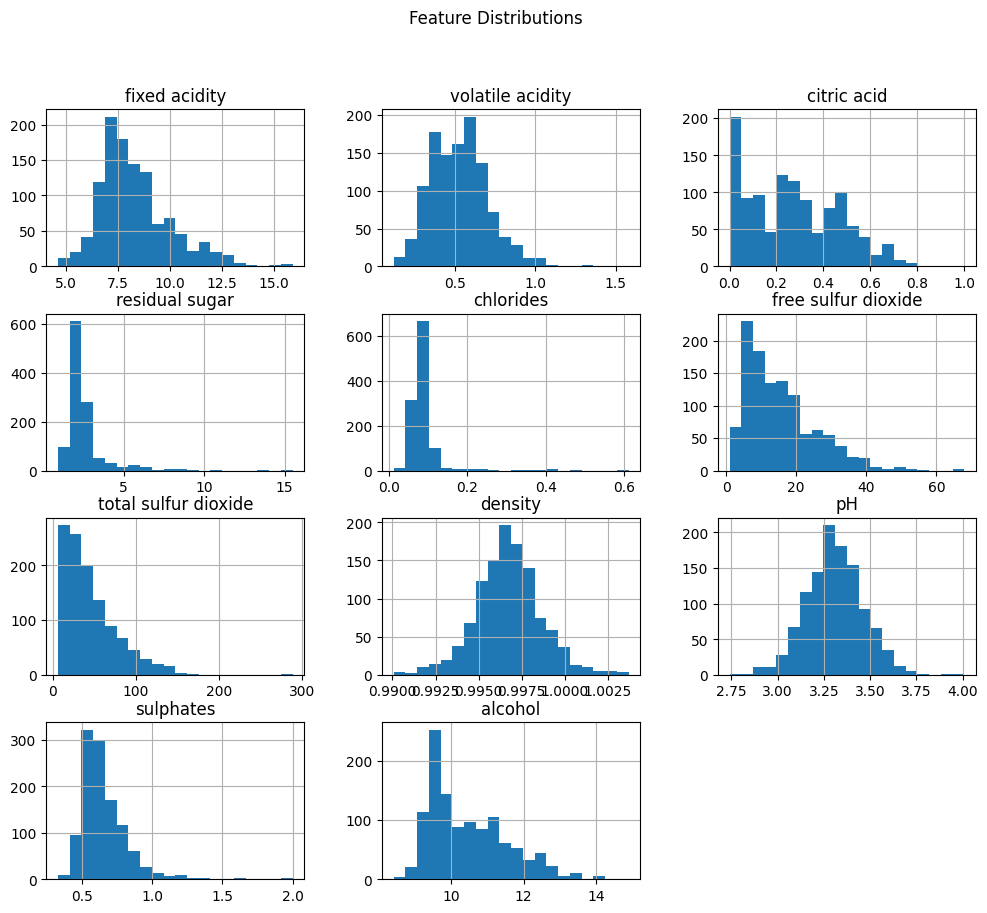

In [7]:
# Visualize the distribution of each feature to spot outliers and skewness.
features = df.drop(['quality', 'Id'], axis=1, errors='ignore')
features.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

# 5. Data Preprocessing (Scaling)
Before applying PCA, I need to scale the features so that each one contributes equally to the analysis. PCA is sensitive to the scale of the data, so I use StandardScaler to standardize the features.

In [8]:
# 5. Data Preprocessing (Scaling)

# Next, I separate the features from the target variable.
features = df.drop(['quality', 'Id'], axis=1, errors='ignore')
target = df['quality']

# If there were categorical variables, I would encode them here. For this dataset, all features are numerical.

# Now, I scale the features so that each one has a mean of zero and a standard deviation of one.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print("Features have been cleaned and standardized.")

Features have been cleaned and standardized.


# 6. Applying PCA
Now I apply Principal Component Analysis to the standardized features. PCA helps me reduce the dimensionality of the data while retaining as much variance as possible. This makes it easier to visualize and analyze complex datasets.

In [9]:
# 6. Applying PCA
# Now I apply Principal Component Analysis to the standardized features.
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# The PCA object has now transformed the original features into principal components.
# Let's look at the explained variance ratio for each component to see how much information each one captures.
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

Explained variance ratio by each principal component:
PC1: 0.2869
PC2: 0.1708
PC3: 0.1431
PC4: 0.1101
PC5: 0.0871
PC6: 0.0605
PC7: 0.0507
PC8: 0.0381
PC9: 0.0313
PC10: 0.0161
PC11: 0.0053


# 7. Interpreting Explained Variance
After applying PCA, look at the explained variance ratio for each principal component. This ratio tells me how much information (variance) each component captures from the original data. Usually, I want to keep enough components to explain most of the variance often 80-95%. By examining these ratios, I can decide how many principal components are needed for further analysis or modeling, balancing simplicity and information retention.

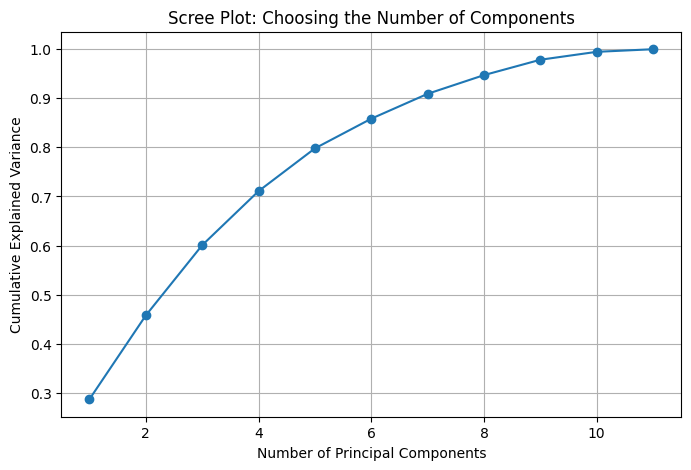

In [10]:
# Plot cumulative explained variance (scree plot)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: Choosing the Number of Components')
plt.grid(True)
plt.show()

# 8. Scree Plot: Choosing the Number of Components
A scree plot helps me visualize how much cumulative variance is explained as I add more principal components. By plotting the cumulative explained variance, I can easily see the point where adding more components yields diminishing returns. I usually select the number of components where the curve starts to flatten, ensuring I capture most of the information while keeping the model simple.

# 9. Visualizing PCA Results
After reducing the dimensionality of the data with PCA, I visualize the first two principal components. This scatter plot helps me see if the data separates into distinct groups or patterns based on the target variable (wine quality). If clusters or trends appear, it means PCA has successfully captured important structure in the data, making it easier to analyze and model.

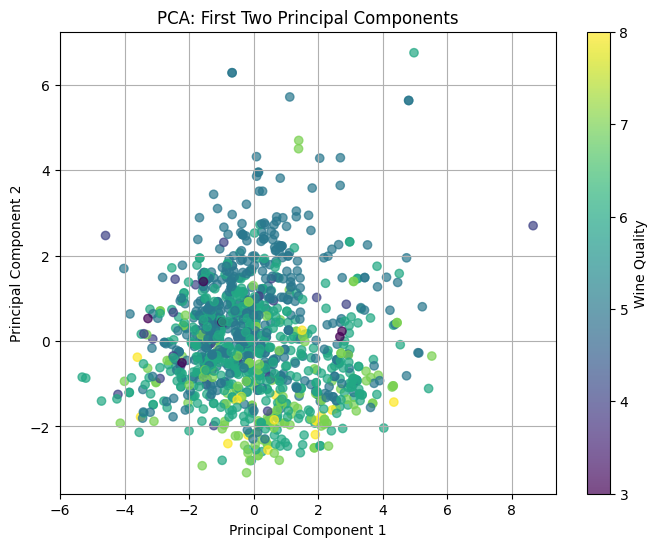

In [11]:
# Visualize the first two principal components in a scatter plot, colored by wine quality
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=target, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
cbar = plt.colorbar(scatter)
cbar.set_label('Wine Quality')
plt.grid(True)
plt.show()

# 10. Impact of PCA on Model Performance (K-Nearest Neighbors)
To show the practical value of PCA, I compare the performance of a K-Nearest Neighbors (KNN) classifier before and after applying PCA. By training the model on both the original features and the principal components, I can see if dimensionality reduction improves accuracy, reduces overfitting, or speeds up computation. This comparison helps me decide whether using PCA is beneficial for my specific dataset and problem.

In [12]:
# Compare KNN performance before and after PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split original scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (Original Features): {acc_original:.4f}")

# Split PCA-transformed data (using first 2 components for demonstration)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca[:, :2], target, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pca_pred = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pca_pred)
print(f"KNN Accuracy (First 2 Principal Components): {acc_pca:.4f}")

KNN Accuracy (Original Features): 0.5633
KNN Accuracy (First 2 Principal Components): 0.5459


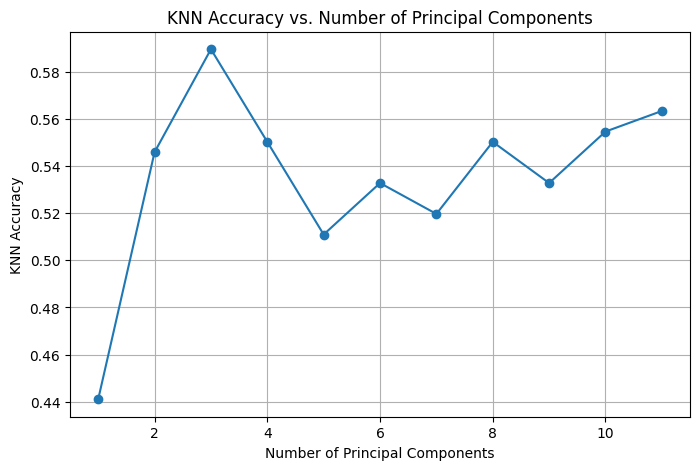

Best accuracy: 0.5895196506550219 with 3 components


In [13]:
# Compare KNN accuracy using different numbers of principal components

max_components = X_pca.shape[1]
accuracies = []
components_range = range(1, max_components+1)
for n in components_range:
    X_pca_n = X_pca[:, :n]
    X_train, X_test, y_train, y_test = train_test_split(X_pca_n, target, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8,5))
plt.plot(components_range, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('KNN Accuracy')
plt.title('KNN Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()
print('Best accuracy:', max(accuracies), 'with', accuracies.index(max(accuracies))+1, 'components')

# Interpreting the Trade-off: Dimensionality Reduction vs. Model Accuracy
When I apply PCA, my goal is to reduce the number of features while retaining as much information as possible. However, there is a trade-off:
- Using fewer principal components makes the model simpler and can help prevent overfitting, but it may also remove information that is important for predicting the target variable, leading to lower accuracy.
- Using more components increases accuracy, but the model becomes more complex and may lose the benefits of dimensionality reduction.
The plot above shows how KNN accuracy changes as I increase the number of principal components. I look for the point where adding more components does not significantly improve accuracy this is usually the optimal balance between simplicity and performance.
In practice, I experiment with different numbers of components to find the best trade-off for my dataset.

# 11. Conclusion
In this notebook, I covered every step of Principal Component Analysis (PCA) using the Wine Quality dataset. I explained the theory, walked through the process, visualized the results, and compared model performance before and after PCA. I hope this helps you understand how PCA can simplify data and improve your analyses. Feel free to experiment with different datasets and PCA settings to see how dimensionality reduction can benefit your own projects.

**If you find it helpful or interesting, an upvote would be really appreciated! 😊**